In [10]:
# pip install nltk

In [11]:
# pip install beautifulsoup

In [12]:
# pip install transformers

In [13]:
# pip install torch==2.3.0  

In [14]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as BS
import requests as req
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
url = "https://www.businesstoday.in/latest/economy"

webpage = req.get(url) # YOU CAN EVEN DIRECTLY PASTE THE URL IN THIS
# HERE HTML PARSER IS ACTUALLY THE WHOLE HTML PAGE
trav = BS(webpage.content, "html.parser")

# TO GET THE TPYE OF CLASS
# HERE 'a' STANDS FOR ANCHOR TAG IN WHICH NEWS IS STORED
for link in trav.find_all('a'):
    print(type(link.string), " ", link.string)

<class 'bs4.element.NavigableString'>   Business Today
<class 'bs4.element.NavigableString'>   BT Bazaar
<class 'bs4.element.NavigableString'>   India Today
<class 'bs4.element.NavigableString'>   Northeast
<class 'bs4.element.NavigableString'>   India Today Gaming
<class 'bs4.element.NavigableString'>   Cosmopolitan
<class 'bs4.element.NavigableString'>   Harper's Bazaar
<class 'bs4.element.NavigableString'>   Brides Today
<class 'bs4.element.NavigableString'>   Ishq FM
<class 'bs4.element.NavigableString'>   Aaj Tak
<class 'bs4.element.NavigableString'>   GNTTV
<class 'bs4.element.NavigableString'>   iChowk
<class 'bs4.element.NavigableString'>   Kisan Tak
<class 'bs4.element.NavigableString'>   Lallantop
<class 'bs4.element.NavigableString'>   Malyalam
<class 'bs4.element.NavigableString'>   Bangla
<class 'bs4.element.NavigableString'>   Sports Tak
<class 'bs4.element.NavigableString'>   Crime Tak
<class 'bs4.element.NavigableString'>   Aajtak Campus
<class 'bs4.element.NavigableStr

In [16]:
from bs4 import BeautifulSoup as BS
import requests as req

url = "https://www.businesstoday.in/latest/economy"

webpage = req.get(url)
trav = BS(webpage.content, "html.parser")
M = 1
for link in trav.find_all('a'):
    # PASTE THE CLASS TYPE THAT WE GET
    # FROM THE ABOVE CODE IN THIS AND
    # SET THE LIMIT GRATER THAN 35
    if(str(type(link.string)) == "<class 'bs4.element.NavigableString'>"
    and len(link.string) > 35):
        print(str(M)+".", link.string)
        M += 1

1. How have the economies of India and China performed in the last two decades?
2. EPFO gross new members addition dips to 10.24 mn in June 2024: Mospi
3. GST relief for Infosys, foreign airlines and shipping lines? Report claims Centre weighing changes
4. RBI MPC Minutes: Food inflation pressures showing little signs of abatement in near term, central bank observes
5. What’s the future of the GST Compensation Cess?
6. 'No need to change tax slabs for now': GST Rate Rationalisation committee 
7. 'Economy sustained its growth momentum first four months in Q1 FY25': Monthly review by Finance Ministry
8. Govt likely to review market practices by e-commerce players and impact on traditional retailers, consumers
9. ‘Complex, expensive’: Further tranches of sovereign gold bonds unlikely 
10. Pulse of the economy: Centre to release several statistical findings in next few months
11. 'Amazon’s investments only to...': Piyush Goyal flags rapid rise of ecommerce in India, says 'not a matter of p

# Tokenization

In [17]:
import nltk
import os
import nltk.corpus# sample text for performing tokenization
text = "Q2 FY24 GDP growth likely at 7% on back of strong agricultural performance, sustained buoyancy in services: SBI Ecowrap"# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
print(token)


['Q2', 'FY24', 'GDP', 'growth', 'likely', 'at', '7', '%', 'on', 'back', 'of', 'strong', 'agricultural', 'performance', ',', 'sustained', 'buoyancy', 'in', 'services', ':', 'SBI', 'Ecowrap']


### Finding frequency distinct in the text

In [18]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist


FreqDist({'Q2': 1, 'FY24': 1, 'GDP': 1, 'growth': 1, 'likely': 1, 'at': 1, '7': 1, '%': 1, 'on': 1, 'back': 1, ...})

In [19]:
fdist1 = fdist.most_common(10)
fdist1


[('Q2', 1),
 ('FY24', 1),
 ('GDP', 1),
 ('growth', 1),
 ('likely', 1),
 ('at', 1),
 ('7', 1),
 ('%', 1),
 ('on', 1),
 ('back', 1)]

# Stemming （原型）
## It works by chopping off the ends of words. Common suffixes like "ing", "ed", "ly", "ion", "tion", "ment", etc are removed.

In [20]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")


'wait'

In [21]:
# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


In [22]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "given", "gave"]
for word in stm :
    print(word+ ":" +lst.stem(word))


giving:giv
given:giv
given:giv
gave:gav


# Lemmatization (眾數變單數）
##  ensures that the root word

In [23]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


rocks : rock
corpora : corpus


### Stop words are the words in a stop list (or stoplist or negative dictionary) which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are deemed insignificant.

In [24]:
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

a = set(stopwords.words("english"))

text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
text1 = word_tokenize(text.lower())

print(text1)
stopwords = [x for x in text1 if x not in a]

print(stopwords)


['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Stopword testing

In [25]:
from bs4 import BeautifulSoup as BS
import requests as req
from nltk.corpus import stopwords

url = "https://www.businesstoday.in/latest/economy"

webpage = req.get(url)
trav = BS(webpage.content, "html.parser")
M = 1
for link in trav.find_all('a'):
    # PASTE THE CLASS TYPE THAT WE GET
    # FROM THE ABOVE CODE IN THIS AND
    # SET THE LIMIT GRATER THAN 35
    if(str(type(link.string)) == "<class 'bs4.element.NavigableString'>"
    and len(link.string) > 35):
        print(str(M)+".", link.string)
        text = word_tokenize(link.string.lower())
        stopwords = [x for x in text if x not in a]
        print(stopwords)
        M += 1

1. How have the economies of India and China performed in the last two decades?
['economies', 'india', 'china', 'performed', 'last', 'two', 'decades', '?']
2. EPFO gross new members addition dips to 10.24 mn in June 2024: Mospi
['epfo', 'gross', 'new', 'members', 'addition', 'dips', '10.24', 'mn', 'june', '2024', ':', 'mospi']
3. GST relief for Infosys, foreign airlines and shipping lines? Report claims Centre weighing changes
['gst', 'relief', 'infosys', ',', 'foreign', 'airlines', 'shipping', 'lines', '?', 'report', 'claims', 'centre', 'weighing', 'changes']
4. RBI MPC Minutes: Food inflation pressures showing little signs of abatement in near term, central bank observes
['rbi', 'mpc', 'minutes', ':', 'food', 'inflation', 'pressures', 'showing', 'little', 'signs', 'abatement', 'near', 'term', ',', 'central', 'bank', 'observes']
5. What’s the future of the GST Compensation Cess?
['’', 'future', 'gst', 'compensation', 'cess', '?']
6. 'No need to change tax slabs for now': GST Rate Rati

# Financial Text Analysis with Finbert 
is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification. <BR>
https://github.com/ProsusAI/finBERT <BR>
https://huggingface.co/ProsusAI/finbert/tree/main <BR>
Paper: https://arxiv.org/abs/1908.10063

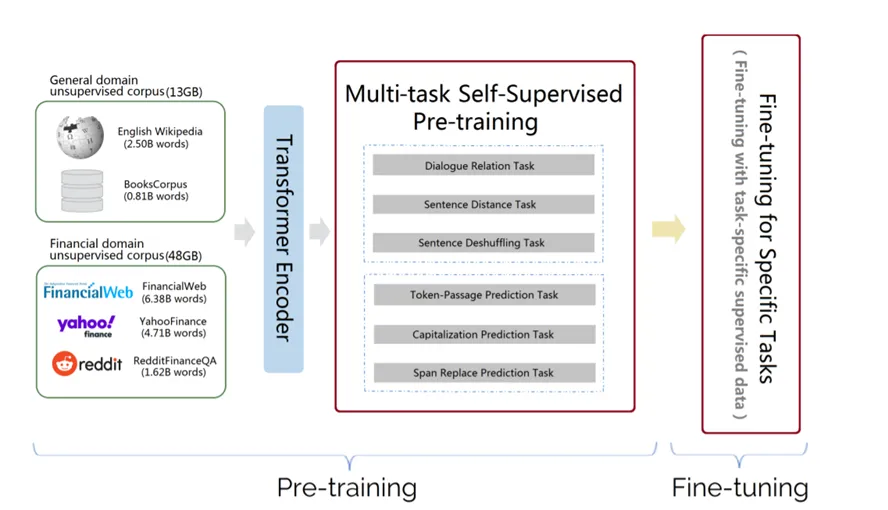

# Transformers 
provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio. <BR>
https://pypi.org/project/transformers/

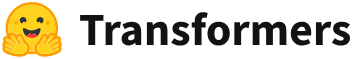

In [28]:
pip install tf_keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pipe = pipeline("text-classification", model="ProsusAI/finbert")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

C:\Users\USER\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
url = "https://www.businesstoday.in/latest/economy"

webpage = req.get(url)
trav = BS(webpage.content, "html.parser")
headline = []
labels = {0:'neutral', 1:'positive',2:'negative'}

for link in trav.find_all('a'):
    if(str(type(link.string)) == "<class 'bs4.element.NavigableString'>"
    and len(link.string) > 35):
        headline.append(link.string)

In [31]:
inputs = tokenizer(headline, padding = True, truncation = True, return_tensors='pt')
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [32]:
# print result shape
outputs.logits.shape

torch.Size([21, 3])

In [33]:
negative = predictions[:, 0].tolist()
positive = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

In [34]:
df_headline = pd.DataFrame(data={'Headline' : headline,
                                 'Negative' : negative,
                                'Positive' : positive,
                                'Neutral' : neutral})
df_headline

,Headline,Negative,Positive,Neutral
0,How have the economies of India and China perf...,0.132677,0.030188,0.837135
1,EPFO gross new members addition dips to 10.24 ...,0.010794,0.967217,0.021989
2,"GST relief for Infosys, foreign airlines and s...",0.102728,0.085320,0.811952
3,RBI MPC Minutes: Food inflation pressures show...,0.370356,0.494432,0.135213
4,What’s the future of the GST Compensation Cess?,0.026876,0.079388,0.893735
5,'No need to change tax slabs for now': GST Rat...,0.047347,0.022568,0.930085
6,'Economy sustained its growth momentum first f...,0.293751,0.029016,0.677233
7,Govt likely to review market practices by e-co...,0.022923,0.357631,0.619446
8,"‘Complex, expensive’: Further tranches of sove...",0.035902,0.092256,0.871842
9,Pulse of the economy: Centre to release severa...,0.114818,0.019828,0.865354


# Test some news headline

In [35]:
content = "AAPL stock price spikes after record-breaking sales figures."

result = torch.nn.functional.softmax(model(**tokenizer(content, padding = True, truncation = True, 
                                              return_tensors='pt')).logits, dim=-1)
print('Negative', result[:, 0].tolist() )
print('Positive', result[:, 1].tolist() )
print('Neutral', result[:, 2].tolist() )

Negative [0.35826799273490906]
Positive [0.5606312155723572]
Neutral [0.0811007171869278]
